## Anscombe's Quartet

Anscombe's Quartet is a famous dataset consisting of four different pairs of x and y values. The question we want to explore is how x is related to y (causes y?) and if that relationship is different in the four different x,y pairs.

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib notebook

### Import Data

First _import_ the *data* provided as a .csv file

In [2]:
df = pd.read_csv("anscombe.csv")

And then using pandas .describe function to look at each set makes sense

In [3]:
df.groupby('set').describe()

x                                               y                      \
    count mean       std  min  25%  50%   75%   max count      mean       std   
set                                                                             
1    11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909  2.031568   
2    11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909  2.031657   
3    11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000  2.030424   
4    11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909  2.030579   

                                     
      min    25%   50%   75%    max  
set                                  
1    4.26  6.315  7.58  8.57  10.84  
2    3.10  6.695  8.14  8.95   9.26  
3    5.39  6.250  7.11  7.98  12.74  
4    5.25  6.170  7.04  8.19  12.50

In [4]:
df.groupby('set').corr()

x         y
set                      
1   x  1.000000  0.816421
    y  0.816421  1.000000
2   x  1.000000  0.816237
    y  0.816237  1.000000
3   x  1.000000  0.816287
    y  0.816287  1.000000
4   x  1.000000  0.816521
    y  0.816521  1.000000

So far the data looks really similar. Y has some differences in min, max, and percentiles, although not drastic. Let's break out everyone's favorite tool, Ordinary Least Squares regression. 

In [5]:
reg1 = smf.ols('y ~ x', data=df[df.set == 1]).fit()
reg2 = smf.ols('y ~ x', data=df[df.set == 2]).fit()
reg3 = smf.ols('y ~ x', data=df[df.set == 3]).fit()
reg4 = smf.ols('y ~ x', data=df[df.set == 4]).fit()

reg1.summary()

/home/nate/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Wed, 15 May 2019   Prob (F-statistic):            0.00217
Time:                        06:07:09   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
reg2.summary()

/home/nate/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 15 May 2019   Prob (F-statistic):            0.00218
Time:                        06:07:09   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026       0.455       5.547
x              0.5000      0.118      4.239      0.002       0.233       0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
reg3.summary()

/home/nate/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 15 May 2019   Prob (F-statistic):            0.00218
Time:                        06:07:09   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0025      1.124      2.670      0.026       0.459       5.546
x              0.4997      0.118      4.239      0.002       0.233       0.766
==============================================================================
Omnibus:                       19.540   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.478
Skew:                           2.041   Prob(JB):                      0.00118
Kurtosis:                       6.571   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
reg4.summary()

/home/nate/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Wed, 15 May 2019   Prob (F-statistic):            0.00216
Time:                        06:07:09   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0017      1.124      2.671      0.026       0.459       5.544
x              0.4999      0.118      4.243      0.002       0.233       0.766
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.524
Skew:                           0.010   Prob(JB):                        0.769
Kurtosis:                       1.931   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All of the regression output is extremely similar. Coefficient of X is 0.5 and is statistically significant in all four cases. R-squared of 0.66 in all four cases. Do we think x causes y? Let's go ahead and plot all the data as well as the regression lines. 

Now I can use lmplot from seaborn. I tell it the x and y values, the data set to pull from, not to draw confidence intervals, to use the 'set' variable to divide up the data into four different plots (col = 'set') and to make those plots different colors (hue = 'set'). Finally, I tell it to give me two rows of plots rather than all four plots in one row (col_wrap = 2).

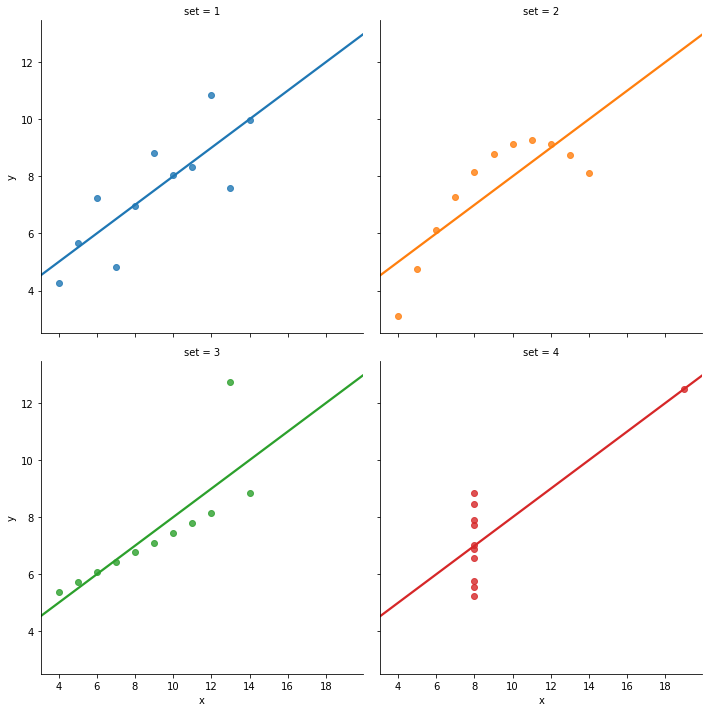

In [9]:
sns.lmplot(x='x', y = 'y', data = df, ci = None, col = 'set', hue = 'set', col_wrap =2)

The data that looked so similar by the numbers is actually entirely different and would call for entirely different methods of analysis.

### ALWAYS PLOT YOUR DATA!!